In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import spin_models as spin

from astropy import constants as const
from astropy import units as u

In [35]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [9]:
df_binary = pd.read_csv("Data/binary-merger-data.csv",index_col= False)
df_binary.head()

,M1,M2,t_merger,Merger,Type
0,2.261179e+09,1.629006e+09,8.587741e+08,Yes,iso
1,1.614773e+09,1.077349e+09,8.934006e+08,Yes,iso
2,6.554858e+09,1.175723e+09,4.120229e+09,Yes,iso
3,7.039616e+09,6.263608e+09,8.933714e+10,No,iso
4,1.179139e+10,3.306548e+09,1.421714e+10,No,iso


In [10]:
df_iso_bbh = df_binary[(df_binary["Type"] == "iso") & (df_binary["Merger"] == "Yes")]

In [11]:
def find_q(M1,M2):
    if (M2>M1):
        q = M1/M2
    else:
        q = M2/M1
    
    return q

In [13]:
N_bbh = len(df_iso_bbh["M1"])

In [17]:
df_iso_bbh["M1"].iloc[1000]

8553948863.636364

In [32]:
def kick_vel_threshold(model,V_thresh):

    M1_list = []
    M2_list = []
    t_merger_list = []
    recoil = []

    for i in range(N_bbh):

        S1,S2 = model()
        q_i = find_q(df_iso_bbh["M1"].iloc[i],df_iso_bbh["M2"].iloc[i])
        Vk = np.linalg.norm(spin.gw_kick(q_i,S1,S2))

        if (Vk > V_thresh):
            M1_list.append(df_iso_bbh["M1"].iloc[i])
            M2_list.append(df_iso_bbh["M2"].iloc[i])
            t_merger_list.append(df_iso_bbh["t_merger"].iloc[i])
            recoil.append(Vk)

    return recoil,M1_list,M2_list,t_merger_list

In [33]:
V_rd,M1_rd,M2_rd,t_rd = kick_vel_threshold(spin.random_dry,500)
df_rd = pd.DataFrame([M1_rd,M2_rd,t_rd,V_rd])
df_rd = df_rd.transpose()
df_rd.columns = ['M1','M2','t_merger','V_kick']
t_rd = df_rd["t_merger"].to_numpy()

In [36]:
z_rd = z_at_value(cosmo.age, (t_rd/10**9)*u.Gyr,zmin=1e-9)
z_rd = np.array(z_rd)

In [37]:
zmax = 7
zbinsize = 0.2
lgzbinsize=0.15
lgzmin=-3.0
lgzmax = 1.0

In [38]:
import Merger_rate_plot as merg

In [39]:
merger_rate,lgzbins_rd,dNdlogzdt_rd = merg.merger_rate_log_plot(z_rd,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

total merger rate (yr^-1):  0.08694238399432401


In [34]:
V_5d,M1_5d,M2_5d,t_5d = kick_vel_threshold(spin.deg5_high,500)
df_5d = pd.DataFrame([M1_5d,M2_5d,t_5d,V_5d])
df_5d = df_5d.transpose()
df_5d.columns = ['M1','M2','t_merger','V_kick']
t_5d = df_5d["t_merger"].to_numpy()

In [41]:
z_5d = z_at_value(cosmo.age, (t_5d/10**9)*u.Gyr,zmin=1e-9)
z_5d = np.array(z_5d)

In [48]:
merger_rate,lgzbins_5d,dNdlogzdt_5d = merg.merger_rate_log_plot(z_5d,zmax,zbinsize,0.3,lgzmin,lgzmax)

total merger rate (yr^-1):  0.0019684170038993904


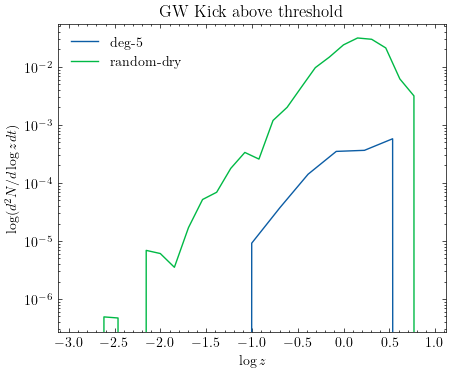

In [62]:
plt.figure(figsize=[5,4])
plt.plot(lgzbins_5d,dNdlogzdt_5d,label="deg-5")
plt.plot(lgzbins_rd,dNdlogzdt_rd,label="random-dry")
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.yscale("log")
plt.legend()
plt.title("GW Kick above threshold")
plt.savefig("Figures/GW-kick-above-threshold.pdf")